In [1]:
from syft import Worker
import syft as sy
import numpy as np
import pandas as pd
worker = Worker.named("test-domain-1", processes=1, reset=False)
root_domain_client = worker.root_client

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/theresa/Desktop/source/PySyft


SQLite Store Path:
!open file:///var/folders/f1/h55w4kj150x0s8c3jwhkkygw0000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.Data

# Summary
By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

## Get mocks

In [2]:
guest_domain_client = worker.guest_client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [3]:
ds = guest_domain_client.datasets[0]

In [4]:
asset = ds.assets[0]

In [5]:
requests = asset.mock

# How do we know if it's messy?
# TODO: Fix this formatting
We're going to look at a few columns here. I know already that there are some problems with the zip code, so let's look at that first.

To get a sense for whether a column has problems, I usually use .unique() to look at all its values. If it's a numeric column, I'll instead plot a histogram to get a sense of the distribution.

When we look at the unique values in "Incident Zip", it quickly becomes clear that this is a mess.

Some of the problems:

Some have been parsed as strings, and some as floats
There are nans
Some of the zip codes are 29616-0759 or 83
There are some N/A values that pandas didn't recognize, like 'N/A' and 'NO CLUE'
What we can do:

Normalize 'N/A' and 'NO CLUE' into regular nan values
Look at what's up with the 83, and decide what to do
Make everything strings

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great examples in the documentation.

In [6]:
requests['Incident Zip'].unique()

array(['10279', '10538', '10334', ..., '10192', '10082', '10264'],
      dtype=object)

# Fixing the nan values and string/float confusion
We can pass a na_values option to pd.read_csv to clean this up a little bit. We can also specify that the type of Incident Zip is a string, not a float.



In [7]:
na_values = ['NO CLUE', 'N/A', '0']
requests.replace(na_values, np.NaN);

In [8]:
requests['Incident Zip'].unique()

array(['10279', '10538', '10334', ..., '10192', '10082', '10264'],
      dtype=object)

# What's up with the dashes?

In [9]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

11058

In [10]:
requests[rows_with_dashes]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
3,916395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10940-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.851712,41.523509,NaN
4,931811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10915-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.948514,19.902980,NaN
22,847263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10970-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.558638,13.719980,NaN
54,82204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10978-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.339914,-86.666586,NaN
89,789471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10910-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.322418,41.302952,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111034,859245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10923-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.831862,50.104354,NaN
111035,882112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10992-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.755243,-34.116990,NaN
111049,748468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10971-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45.081033,-71.301253,NaN
111052,63162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10946-1234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.394351,21.916025,NaN


# I thought these were missing data and originally deleted them like this:

`requests['Incident Zip'][rows_with_dashes] = np.nan`

But then my friend Dave pointed out that 9-digit zip codes are normal. Let's look at all the zip codes with more than 5 digits, make sure they're okay, and then truncate them.

In [11]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['10940-1234', '10915-1234', '10970-1234', '10978-1234',
       '10910-1234', '10951-1234', '10960-1234', '10957-1234',
       '10954-1234', '10955-1234', '10938-1234', '10996-1234',
       '10924-1234', '10930-1234', '10977-1234', '10998-1234',
       '10945-1234', '10988-1234', '10975-1234', '10976-1234',
       '10980-1234', '10989-1234', '10917-1234', '10949-1234',
       '10991-1234', '10933-1234', '10999-1234', '10967-1234',
       '10929-1234', '10995-1234', '10946-1234', '10992-1234',
       '10948-1234', '10903-1234', '10911-1234', '10961-1234',
       '10931-1234', '10927-1234', '10952-1234', '10974-1234',
       '10921-1234', '10985-1234', '10958-1234', '10972-1234',
       '10936-1234', '10983-1234', '11000-1234', '10905-1234',
       '10997-1234', '10932-1234', '10935-1234', '10908-1234',
       '10966-1234', '10953-1234', '10913-1234', '10971-1234',
       '10969-1234', '10950-1234', '10962-1234', '10963-1234',
       '10943-1234', '10987-1234', '10986-1234', '10920

Those all look okay to truncate to me.

In [12]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

Done.

Earlier I thought 00083 was a broken zip code, but turns out Central Park's zip code 00083! Shows what I know. I'm still concerned about the 00000 zip codes, though: let's look at that.

In [13]:
requests[requests['Incident Zip'] == '00000'] 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


This looks bad to me. Let's set these to nan.

In [14]:
zero_zips = requests['Incident Zip'] == '00000'
requests.loc[zero_zips, 'Incident Zip'] = np.nan

ValueError: object __array__ method not producing an array

In [ ]:
%debug

> /Users/theresa/opt/anaconda3/envs/OpenMined/lib/python3.9/site-packages/pandas/core/dtypes/cast.py(1784)construct_1d_object_array_from_listlike()
   1782     # making a 1D array that contains list-likes is a bit tricky:
   1783     result = np.empty(len(values), dtype="object")
-> 1784     result[:] = values
   1785     return result
   1786 

ipdb> u
> /Users/theresa/opt/anaconda3/envs/OpenMined/lib/python3.9/site-packages/pandas/core/common.py(255)asarray_tuplesafe()
    253         # error: Argument 1 to "construct_1d_object_array_from_listlike"
    254         # has incompatible type "Iterable[Any]"; expected "Sized"
--> 255         return construct_1d_object_array_from_listlike(values)  # type: ignore[arg-type]
    256 
    257     if issubclass(result.dtype.type, str):

ipdb> u
> /Users/theresa/opt/anaconda3/envs/OpenMined/lib/python3.9/site-packages/pandas/core/indexes/base.py(6062)_get_indexer_strict()
   6060         keyarr = key
   6061         if not isinstance(keyarr, Ind

ipdb> original_args
((0         False
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066    False
111067    False
111068    False
Name: Incident Zip, Length: 111069, dtype: bool, 'Incident Zip'), nan)
ipdb> type(original_args[0])
<class 'tuple'>
ipdb> type(original_args[0][0])
<class 'syft.core.node.new.pandas.PandasSeriesObject'>
ipdb> pre_hook_args[0]
(0         False
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066    False
111067    False
111068    False
Name: Incident Zip, Length: 111069, dtype: bool, 'Incident Zip')
ipdb> type(pre_hook_args[0])
<class 'tuple'>
ipdb> type(pre_hook_args[0][0])
<class 'syft.core.node.new.pandas.PandasSeriesObject'>
ipdb> u
> /Users/theresa/opt/anaconda3/envs/OpenMined/lib/python3.9/site-packages/syft/core/node/new/action_object.py(677)__setitem__()
    675 
    676     def __setitem__(self, key: Any, value: Any) -

and then use resample to find the percentage of time it was snowing each month

In [ ]:
is_snowing.astype(float).resample('M').apply(np.mean)

2010-06-30    0.366667
2010-07-31    0.483871
2010-08-31    0.354839
2010-09-30    0.266667
2010-10-31    0.451613
                ...   
2034-02-28    0.357143
2034-03-31    0.290323
2034-04-30    0.366667
2034-05-31    0.322581
2034-06-30    0.333333
Freq: M, Name: Weather, Length: 289, dtype: float64

<AxesSubplot: >

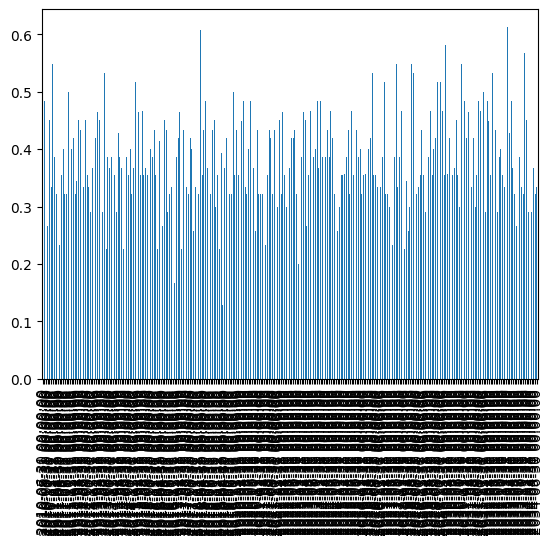

In [ ]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.


## Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:



In [ ]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [ ]:
stats = pd.concat([temperature, snowiness], axis=1)

In [ ]:
stats.columns = ["temperature", "snowiness"]

## Putting it together

Now we want to request the full code execution.

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing sum to max, numpy.median, or any other function you like.

In [ ]:
@sy.syft_function(input_policy=sy.ExactMatch(df=ds.assets[0]),
                  output_policy=sy.SingleExecutionExactOutput())
def snow_and_temperature(df):
    import pandas as pd
    import numpy as np
    weather_2012 = df
    weather_description = weather_2012['Weather']
    is_snowing = weather_description.str.contains('Snow')
    
    median_temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
    snow_frequency = is_snowing.astype(float).resample('M').apply(np.mean)
    
    temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
    is_snowing = weather_2012['Weather'].str.contains('Snow')
    snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

    # Name the columns
    temperature.name = "Temperature"
    snowiness.name = "Snowiness"
    stats = pd.concat([temperature, snowiness], axis=1)
    stats.columns = ["temperature", "snowiness"]
    
    return is_snowing.astype(float), median_temperature, snow_frequency, stats

Request code execution

In [ ]:
req = guest_domain_client.api.services.code.request_code_execution(snow_and_temperature)

In [ ]:
submitted_code = guest_domain_client.code[0]

In [ ]:
assert guest_domain_client.api.services.code.get_all()

Create and submit project

In [ ]:
new_project = sy.Project(name="Pandas Chapter 5",
                         description="Hi, I would like to get some insights about snow and temperature for 2012")

In [ ]:
new_project.add_request(obj=submitted_code, permission=sy.UserCodeStatus.EXECUTE)

In [ ]:
guest_domain_client.submit_project(new_project)

<class 'syft.core.node.new.response.SyftSuccess'>: Project Submitted